# Useful Libraries for Linear Algebra, Optimization, Plotting, & Data Management

Today we'll be reviewing a little bit and going over some of the advanced libraries in python. The main topics will be the linear algebra library `numpy`, the data organization library `pandas`, the optimization library `scipy`, and the plotting library `matplotlib`.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Image

## Numerical Python: The NumPy Library

Numpy is not part of the "standard library", but it might as well be for us.
Numpy is Python's answer to Matlab - the "back end" is implemented in C/C++, 
so its performance is **very** fast, compared to a purely Python implementation.

In [1]:
import numpy as np

### Creating numpy arrays

There are a number of ways to initialize new numpy arrays, for example from

* a Python list or tuples
* using functions that are dedicated to generating numpy arrays, such as `np.arange`, `np.linspace`, etc.
* reading data from files


In [3]:
# Creating a NumPy array directly
v = np.array([1,2,3,4], dtype='float64')
print(v)

m = np.array([[1,2],
              [3,4]])
print(m)

[1. 2. 3. 4.]
[[1 2]
 [3 4]]


### Mathematical Opterations With Numpy Arrays

The default behavior for mathematical operations done to NumPy arrays are for
the operation to be performed _elementwise_, a NumPy functionality called _broadcasting_.
Let's see this in action:

In [4]:
# Elementwise operations on arrays
s = np.array([1,2,3,4])

print(s + 1)

print(s ** 2)

j = np.array([1,1,1,1])

print(s - j)

[2 3 4 5]
[ 1  4  9 16]
[0 1 2 3]


It is often more efficient to generate large arrays using built-in NumPy functionality
rather than creating them directly from lists. There are a few useful functions for this in numpy:

* `np.arange` - create a range with a specified step size (endpoints not included)
* `np.linspace` - create a range with a specified number of points (endpoints *are* included)
* `np.logspace` - create a range with a specified number of points in log space (endpoints *are* included)
* `np.mgrid` - create points on a multi-dimensional grid (similar to meshgrid in matlab)
* `np.random.rand` - create random number matrix from a uniform distribution
* `np.random.randn` - create random number matrix from a standard normal distribution
* `np.zeros` - create a matrix of zeros
* `np.ones` - create a matrix of ones
* `np.eye` - create identity matrix

As always, be sure to check the [manual](https://docs.scipy.org/doc/numpy/reference/) if you get confused!

In [5]:
# Illustrating array creation using built-in functions
l = np.arange(1,4,0.1)
print(l)

k = np.eye(3)
print(k)

j = np.random.rand(3,3,3)
print(j)

[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7
 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[[0.20648631 0.67919601 0.38077976]
  [0.96556626 0.82888105 0.48728944]
  [0.66638297 0.78893154 0.05075971]]

 [[0.15983705 0.79109885 0.26677494]
  [0.36991781 0.09693706 0.07362248]
  [0.30950758 0.61425028 0.56553756]]

 [[0.60092778 0.44149955 0.82219241]
  [0.42439536 0.78586336 0.01490537]
  [0.02609561 0.60626949 0.14562603]]]


### Indexing & Slicing Arrays

NumPy arrays can be indexed and sliced in an analogous manner to standard Python lists:

In [6]:
print(j[2][2][1])
print(j[2,2,1])

0.6062694880196599
0.6062694880196599


### Matrix Operations

One of the most powerful applications of NumPy is in the context of numerical linear algebra.
When solving matrix equations, for example, NumPy is extremely fast thanks to its hybrid
Python/C++ architecture.

In [9]:
# Create a matrix and a vector
A = np.array([[3,4],
              [5,6]])
b = np.array([1, 2])

# Elementwise multiplication
print(A * b)

# Matrix-vector multiplication
print(np.matmul(A, b))

# Cross product of two vectors
c = np.array([1,0,0])
d = np.array([0,1,0])

print(np.cross(c,d))

[[ 3  8]
 [ 5 12]]
[11 17]
[0 0 1]


### Reshaping Arrays

Sometimes, data can be arranged in a format that is not compatible with a particular operation,
like matrix multiplication.  We can use the `np.ndarray.reshape()` method to revise the dimensions
of our arrays:

In [11]:
# A is a 2x2 Matrix
print(A.reshape(1,4)) # Flatten to 1-d row vector
print(A.reshape(4,1)) # Flatten to 1-d column vector

[[3 4 5 6]]
[[3]
 [4]
 [5]
 [6]]


## NumPy Activity

Make two arrays (x and y.) The first is a linear spacing of 40 numbers between 0 and 10. The second, y, evaluates the equation below. Then add normally distributed noise to it that has a mean of 1 and a standard deviation of 0.5 We'll use this for plotting in the next section.

$y = 0.04x^3 - 0.5x^2 + 2.5x$

In [12]:
# Define x & y
x = np.linspace(0,10,40)
y = 0.04 * x ** 3 - 0.5 * x ** 2 + 2.5 * x

# Perturb y with noise
y += np.random.randn(len(y)) * 0.5 + 1

## `matplotlib`: Plotting in Python

Matplotlib has advantages:

* Easy to get started (MATLAB-like interface)
* Support for LaTeX formatted labels and texts
* Output in many formats, including PNG, PDF, SVG, EPS, and PGF.
* Extensive gallery of examples with source code (https://matplotlib.org/gallery.html)
* Programmatic control over all aspects of figures


Other plotting tools are available (Plotly, Bokeh, D3, ...) but `matplotlib` is the workhorse.

Matplotlib can be used in two ways:

* `pylab` modules (works like MATLAB)
* object-oreinted interface (harder but more powerful)

### Pylab Interface

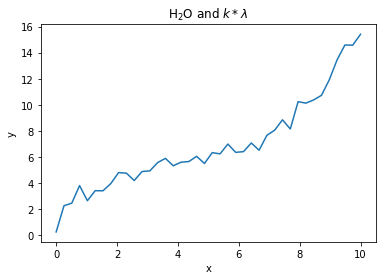

In [17]:
# Bring all of Pylab into current namespace
from pylab import *

# Plot (x, y) from NumPy activity
figure()
plot(x,y)
xlabel('x')
ylabel('y')
title('H$_2$O and $k * \lambda$')
show()

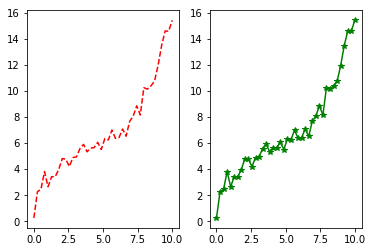

In [14]:
# Can even do subplots side-by-side!
subplot(1,2,1)
plot(x, y, 'r--')
subplot(1,2,2)
plot(x,y, 'g*-')

### The `matplotlib` API

The `pylab` interface is easy, but limited.

* Use simple global functions that match with MATLAB
* Objects are implicitly defined and hidden from users.

The `matplotlib.pyplot` API is harder to learn, but much more powerful.

* Use objects instead of global functions.
* Explicitly define objects - much better for multiple figures.

In [15]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

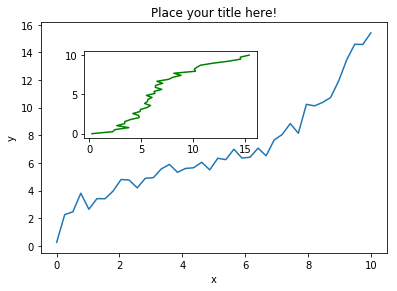

In [19]:
# Create figure object instance
fig = plt.figure()

# Add multiple axes objects to figure instance
axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # Main plot
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # Inset plot

# Plot (x, y) from NumPy activity on main axes
axes1.plot(x, y)
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('Place your title here!')

# Plot (y, x) from NumPy activity on inset axes
axes2.plot(y, x, 'g')

### Saving figures

To save a figure to a file we can use the `savefig` method in the `Figure` class. You can output in many formats, but the most common are:

* PNG (raster)
* JPG (raster)
* SVG (vector)
* PDF (vector)

The SVG and PDF formats are great because they can be edited afterward with vector graphics programs like Inkscape or Adobe Illustrator.

In [16]:
fig.savefig('cool_fig.pdf')

### The `matplotlib` Gallery

Matplotlib is a complicated library. The matplotlib gallery is the most useful resource for learning matplotlib:

https://matplotlib.org/gallery.html

### Activitiy

Make a barchart with the following data with red bars. Then put the word "Success!" above the data at a 30 degree angle. 

(hint: Use the matplotlib gallery to get on the right track)

Text(0.9,73.6641,'Success!')

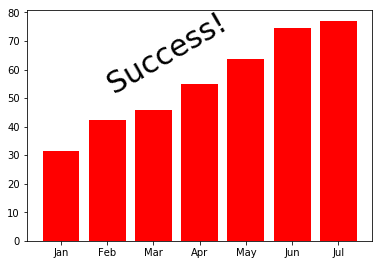

In [20]:
month = ['Jan','Feb','Mar','Apr','May','Jun','Jul']
amount = np.linspace(30,80,7) + np.random.randn(7) * 3

fig = plt.figure()

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.bar(month, amount, color = 'r')

s = 'Success!'

axes.text(0.9, amount[4] + 10, s, rotation = 30, fontsize = 30)

## The Scipy Library: Scientific Computing Made Easy

Scipy is a library focused on tools that scientists will often need, such as optimization, statistics, and numerical integration.

### Linear Regression

One of the topics we'll be discussing this semester is regression, where a model function is
fit to existing data to make future predictions.  Everyone has probably fit a line to some
scattered data before using Excel -- this is exactly a linear regression!

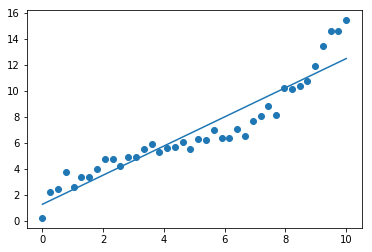

In [21]:
from scipy.stats import linregress

# Fit a line to (x, y) data from NumPy activity
m, b, r, p, stderr = linregress(x,y)

# Plot it to see how we did!
plt.scatter(x,y)
plt.plot(x, x*m + b)

## Polynomial Fitting

If a linear fit doesn't seem good enough, both `numpy` and `scipy` have tools for fitting polynomials
to data.  Let's use the NumPy version, `np.polyfit`, to fit our data:

[ 0.03886667 -0.48233117  2.41510449  1.12902513]


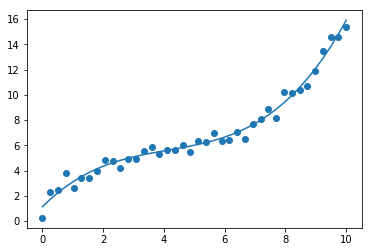

In [22]:
# Fit a degree 3 polynomial to our data
coeffs = np.polyfit(x, y, 3) # Fitting returns coefficients for polynomial
p = np.poly1d(coeffs) # Can now create a function object from coefficients

# How'd we do?
plt.scatter(x,y)
plt.plot(x,p(x))

print(coeffs)


### Model Selection With The Bayesian Information Criterion

Bayesian information criterion (BIC) attempts to balance the complexity of a model 
with its goodness of fit, it is defined to be:

$ BIC = n*\ln{(\sigma^2_e)} + k*\ln(n)$

where $n$ is the number of data points, $\sigma_e$ is the standard deviation of the 
error, and $k$ is the number of parameters.

(Lower BIC is better)

In [26]:
# Here's a function that implements the BIC
def BIC(y, yhat, k, weight = 1):
    err = y - yhat
    sigma = np.std(np.real(err))
    n = len(y)
    B = n*np.log(sigma**2) + weight*k*np.log(n)
    return B

h = BIC(y,p(x),3)
print(h)

-69.71846896521862


If we didn't know what our generating function was, we'd likely not know how $x$ and $y$ are related.
To find the best polynomial fit, then, we'd need to try several different fits -- let's loop through
different polynomial orders, and determine which is the best model using the BIC:

Text(0.5,0,'polynomial order')

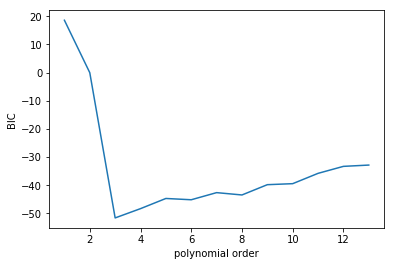

In [27]:
# Save errors
err = []
poly_range = range(1,14)
for i in poly_range:
    coefficients = np.polyfit(x, y, i)
    p = np.poly1d(coefficients)
    err.append(BIC(y,p(x),i))

plt.plot(range(1,14),err)
plt.ylabel('BIC')
plt.xlabel('polynomial order')

### Arbitrary Functional Forms

Sometimes, it may be convenient to fit different types of functions than a simple polynomial.  Fortunately, SciPy has the ability to optimize arbitrary functional forms!

[1.1191798  1.29063226]


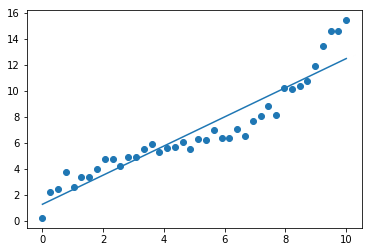

In [28]:
# Import curve fitting module from SciPy
from scipy.optimize import curve_fit

# Define a simple line
def line(x,m,b):
    return m*x+b

# Fit a line to our data
params, params_covariance = curve_fit(line,x,y)

# Plot our data
print(params)
plt.figure()
plt.scatter(x,y)
plt.plot(np.linspace(x[0],x[-1],100),
         line(np.linspace(x[0],x[-1],100), *params))  # Note: passing in aruguments with `*params`

### Optimization

Let's say we'd like to find the minimum of a curve.  Scipy's `optimize` module can do this too.

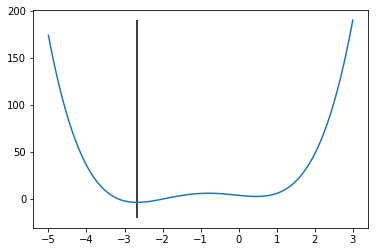

In [34]:
# Define function
def f(x):
    return 4*x**3 + (x-2)**2 + x**4

fig, ax  = plt.subplots()
x = np.linspace(-5, 3, 100)
y = f(x)
ax.plot(x, y)

from scipy import optimize

# Find the location of the minimum, starting from a guess
x_min = optimize.minimize(f,  -1)
plt.vlines(x_min.x, -20, 190, 'k')

## Working with Data using the `pandas` Library

This exercise was adapted for our bootcamp from [this lesson](https://datacarpentry.org/python-ecology-lesson/) of the [Data Carpentry](https://datacarpentry.org/) series of workshops.  In this lesson, we will be exploring the [`pandas`](https://pandas.pydata.org/) library for data analysis, by working with a set of ecological data recorded in the Chihuahua desert in Arizona.  Please follow along with this activity by filling in the code cells while we go through this notebook together.

## Working With Pandas DataFrames in Python

We can automate the process of performing data manipulations in Python. It's efficient to spend time
building the code to perform these tasks because once it's built, we can use it
over and over on different datasets that use a similar format. This makes our
methods easily reproducible. We can also easily share our code with colleagues
and they can replicate the same analysis.

### Our Data

For this lesson, we will be using the Portal Teaching data, a subset of the data
from Ernst _et al._
Long-term monitoring and experimental manipulation of a Chihuahuan Desert ecosystem near Portal,
Arizona, USA.

This lesson will use the `surveys.csv` file included in the `data/` directory.

We are studying the species and weight of animals caught in sites in our study
area. The dataset is stored as a `.csv` file: each row holds information for a
single animal, and the columns represent:

| Column           | Description                        |
|------------------|------------------------------------|
| record_id        | Unique id for the observation      |
| month            | month of observation               |
| day              | day of observation                 |
| year             | year of observation                |
| plot_id          | ID of a particular site            |
| species_id       | 2-letter code                      |
| sex              | sex of animal ("M", "F")           |
| hindfoot_length  | length of the hindfoot in mm       |
| weight           | weight of the animal in grams      |


The first few rows of our first file look like this:

~~~
record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
1,7,16,1977,2,NL,M,32,
2,7,16,1977,3,NL,M,33,
3,7,16,1977,2,DM,F,37,
4,7,16,1977,7,DM,M,36,
5,7,16,1977,3,DM,M,35,
6,7,16,1977,1,PF,M,14,
7,7,16,1977,2,PE,F,,
8,7,16,1977,1,DM,M,37,
9,7,16,1977,1,DM,F,34,
~~~

### Pandas in Python
One of the best options for working with tabular data in Python is to use the
[Python Data Analysis Library][pandas] (a.k.a. Pandas). The
Pandas library provides data structures, produces high quality plots with
[matplotlib][matplotlib] and integrates nicely with other libraries
that use [NumPy][numpy] (which is another Python library) arrays.

Python doesn't load all of the libraries available to it by default. We have to
add an `import` statement to our code in order to use library functions. To import
a library, we use the syntax `import libraryName`. If we want to give the
library a nickname to shorten the command, we can add `as nickNameHere`.  An
example of importing the pandas library using the common nickname `pd` is below:

```python
import pandas as pd
```
In the cell below, please import `pandas` with the appropriate abbreviation.


In [1]:
# Import the Pandas library on the next line
import pandas as pd

Each time we call a function that's in a library, we use the syntax
`LibraryName.FunctionName`. Adding the library name with a `.` before the
function name tells Python where to find the function. In the example above, we
have imported Pandas as `pd`. This means we don't have to type out `pandas` each
time we call a Pandas function.


### Reading CSV Data Using Pandas

We will begin by locating and reading our survey data which are in CSV format. CSV stands for
Comma-Separated Values and is a common way store formatted data. Other symbols may also be used, so
you might see tab-separated, colon-separated or space separated files. It is quite easy to replace
one separator with another, to match your application. The first line in the file often has headers
to explain what is in each column. CSV (and other separators) make it easy to share data, and can be
imported and exported from many applications, including Microsoft Excel.
We can use Pandas' `read_csv` function to pull the file directly into a 
[`pd.DataFrame`](https://pandas.pydata.org/pandas-docs/stable/getting_started/dsintro.html#dataframe):

In [2]:
# Note that pd.read_csv is used because we imported pandas as pd
pd.read_csv("data/surveys.csv")

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
5,6,7,16,1977,1,PF,M,14.0,NaN
6,7,7,16,1977,2,PE,F,NaN,NaN
7,8,7,16,1977,1,DM,M,37.0,NaN
8,9,7,16,1977,1,DM,F,34.0,NaN
9,10,7,16,1977,6,PF,F,20.0,NaN


We can see that there were 35,549 rows parsed. Each row has 9
columns. The first column is the index of the DataFrame. The index is used to
identify the position of the data, but it is not an actual column of the DataFrame.
It looks like  the `read_csv` function in Pandas  read our file properly. However,
we haven't saved any data to memory so we can work with it. We need to assign the
DataFrame to a variable. Remember that a variable is a name for a value, such as `x`,
or  `data`. We can create a new  object with a variable name by assigning a value to it using `=`.

Let's call the imported survey data `surveys_df`:

In [3]:
# Load the data from `surveys.csv` into a variable
surveys_df = pd.read_csv('data/surveys.csv')

Notice when you assign the imported DataFrame to a variable, Python does not
produce any output on the screen. We can view the value of the `surveys_df`
object by typing its name into the Python command prompt, which prints contents like above.

Note: if the output is too wide to print on your narrow terminal window, you may see something
slightly different as the large set of data scrolls past. You may see simply the last column
of data:
```
17        NaN
18        NaN
19        NaN
20        NaN
21        NaN
22        NaN
23        NaN
24        NaN
...       ...
35543     NaN
35544     NaN
35545     NaN
35546    14.0
35547    51.0
35548     NaN

[35549 rows x 9 columns]
```
Never fear, all the data is there, if you scroll up. Selecting just a few rows, so it is
easier to fit on one window, you can see that pandas has neatly formatted the data to fit
our screen:
```
>>> surveys_df.head() # The head() method displays the first several lines of a file. It
                      # is discussed below.
                  
   record_id  month  day  year  plot_id species_id sex  hindfoot_length  \
5          6      7   16  1977        1         PF   M             14.0
6          7      7   16  1977        2         PE   F              NaN
7          8      7   16  1977        1         DM   M             37.0
8          9      7   16  1977        1         DM   F             34.0
9         10      7   16  1977        6         PF   F             20.0

   weight
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
```

## Exploring Our Species Survey Data

Again, we can use the `type` function to see what kind of thing `surveys_df` is:

In [4]:
# Use the Python built-in function type()
type(surveys_df)

# this does the same thing as the above!
# surveys_df.__class__  

pandas.core.frame.DataFrame

As expected, it's a DataFrame (or, to use the full name that Python uses to refer
to it internally, a `pandas.core.frame.DataFrame`).

What kind of things does `surveys_df` contain? DataFrames have an attribute
called `dtypes` that answers this:

In [5]:
# Call the surveys_df `dtypes` attribute
surveys_df.dtypes

record_id            int64
month                int64
day                  int64
year                 int64
plot_id              int64
species_id          object
sex                 object
hindfoot_length    float64
weight             float64
dtype: object

All the values in a column have the same type. For example, months have type
`int64`, which is a kind of integer. Cells in the month column cannot have
fractional values, but the weight and hindfoot_length columns can, because they
have type `float64`. The `object` type doesn't have a very helpful name, but in
this case it represents strings (such as 'M' and 'F' in the case of sex).

We'll talk a bit more about what the different formats mean in a different lesson.

### Useful Ways to View DataFrame objects in Python

There are many ways to summarize and access the data stored in DataFrames,
using attributes and methods provided by the DataFrame object.

To access an attribute, use the DataFrame object name followed by the attribute
name `df_object.attribute`. Using the DataFrame `surveys_df` and attribute
`columns`, an index of all the column names in the DataFrame can be accessed
with `surveys_df.columns`.

Methods are called in a similar fashion using the syntax `df_object.method()`.
As an example, `surveys_df.head()` gets the first few rows in the DataFrame
`surveys_df` using **the `head()` method**. With a method, we can supply extra
information in the parens to control behaviour.

Let's look at the data using these.

---

### Challenge: DataFrames

> Using our DataFrame `surveys_df`, try out the attributes & methods below to see
> what they return.
>
> 1. `surveys_df.columns`
> 2. `surveys_df.shape` Take note of the output of `shape` - what format does it
>    return the shape of the DataFrame in?
>
>    HINT: [More on tuples, here][python-datastructures].
> 3. `surveys_df.head()` Also, what does `surveys_df.head(15)` do?
> 4. `surveys_df.tail()`

In [6]:
# Fill in code for DataFrames Challenge here!


## Calculating Statistics From Data In A Pandas DataFrame

We've read our data into Python. Next, let's perform some quick summary
statistics to learn more about the data that we're working with. We might want
to know how many animals were collected in each site, or how many of each
species were caught. We can perform summary stats quickly using groups. But
first we need to figure out what we want to group by.

Let's begin by exploring our data. Let's get a list of all the species. The `pd.unique` 
function tells us all of the unique values in the `species_id` column. We can examine
a single column of the dataframe by indexing by the name of the column of interest:
```python
surveys_df['species_id']
```

In [7]:
# Call pd.unique() on column of dataframe
pd.unique(surveys_df['species_id'])

array(['NL', 'DM', 'PF', 'PE', 'DS', 'PP', 'SH', 'OT', 'DO', 'OX', 'SS',
       'OL', 'RM', nan, 'SA', 'PM', 'AH', 'DX', 'AB', 'CB', 'CM', 'CQ',
       'RF', 'PC', 'PG', 'PH', 'PU', 'CV', 'UR', 'UP', 'ZL', 'UL', 'CS',
       'SC', 'BA', 'SF', 'RO', 'AS', 'SO', 'PI', 'ST', 'CU', 'SU', 'RX',
       'PB', 'PL', 'PX', 'CT', 'US'], dtype=object)

### Challenge: Statistics
>
> 1. Create a list of unique site ID's ("plot_id") found in the surveys data. Call it
>   `site_names`. How many unique sites are there in the data? How many unique
>   species are in the data?
>
> 2. What is the difference between `len(site_names)` and `surveys_df['plot_id'].nunique()`?

In [8]:
# Solve Statistics Challenge here!


## Groups in Pandas

We often want to calculate summary statistics grouped by subsets or attributes
within fields of our data. For example, we might want to calculate the average
weight of all individuals per site.

We can calculate basic statistics for all records in a single column using the
`describe()` method with syntax
```python
df['column'].describe()
```

In [9]:
# Describe the "weight" column of our survey
surveys_df['weight'].describe()

count    32283.000000
mean        42.672428
std         36.631259
min          4.000000
25%         20.000000
50%         37.000000
75%         48.000000
max        280.000000
Name: weight, dtype: float64

We can also extract one specific metric if we wish:

In [10]:
# Obtain summary statistics for the "weight" column:
weight_min = surveys_df['weight'].min()  # Minimum
weight_max = surveys_df['weight'].max()  # Maximum
weight_mean = surveys_df['weight'].mean() # Mean
weight_std = surveys_df['weight'].std() # Standard Deviation
weight_count = surveys_df['weight'].count() # Count of entries in column

print(f'Minimum weight: {weight_min}')
print(f'Maximum weight: {weight_max}')
print(f'Mean weight: {weight_mean}')
print(f'Standard Deviation of weight: {weight_std}')
print(f'Count of entries in weight column: {weight_count}')

Minimum weight: 4.0
Maximum weight: 280.0
Mean weight: 42.672428212991356
Standard Deviation of weight: 36.63125947458399
Count of entries in weight column: 32283


But if we want to summarize by one or more variables, for example sex, we can
use **Pandas' `.groupby` method**. Once we've created a groupby DataFrame, we
can quickly calculate summary statistics by a group of our choice.

In [11]:
# Group data by sex
grouped_data = surveys_df.groupby('sex')

The **pandas function `describe`** will return descriptive stats including: mean,
median, max, min, std and count for a particular column in the data. Pandas'
`describe` function will only return summary values for columns containing
numeric data. In the cell below, describe the data grouped by sex:

In [12]:
# summary statistics for all numeric columns by sex
grouped_data.describe()

# provide the mean for each numeric column by sex
#grouped_data.mean()

day                                                  hindfoot_length  \
       count       mean       std  min  25%   50%   75%   max           count   
sex                                                                             
F    15690.0  16.007138  8.271144  1.0  9.0  16.0  23.0  31.0         14894.0   
M    17348.0  16.184286  8.199274  1.0  9.0  16.0  23.0  31.0         16476.0   

                 ...   weight            year                                 \
          mean   ...      75%    max    count         mean       std     min   
sex              ...                                                           
F    28.836780   ...     46.0  274.0  15690.0  1990.644997  7.598725  1977.0   
M    29.709578   ...     49.0  280.0  17348.0  1990.480401  7.403655  1977.0   

                                     
        25%     50%     75%     max  
sex                                  
F    1984.0  1990.0  1997.0  2002.0  
M    1984.0  1990.0  1997.0  2002.0  

[2 rows x 56 columns]

The `groupby` command is powerful in that it allows us to quickly generate
summary stats.

### Challenge: Summary Data
>
> 1. How many recorded individuals are female `F` and how many male `M`
> 2. What happens when you group by two columns using the following syntax and
>    then grab mean values:
>   - `grouped_data2 = surveys_df.groupby(['plot_id','sex'])`
>   - `grouped_data2.mean()`
> 3. Summarize weight values for each site in your data. HINT: you can use the
>   following syntax to only create summary statistics for one column in your data
>   `by_site['weight'].describe()`
>
>


In [13]:
# Write your code for the Summary Data challenge below!


> ## Did you get #3 right?
> **A Snippet of the Output from challenge 3 looks like:**
>
> ~~~
>  site
>  1     count    1903.000000
>        mean       51.822911
>        std        38.176670
>        min         4.000000
>        25%        30.000000
>        50%        44.000000
>        75%        53.000000
>        max       231.000000
>          ...
> ~~~

## Quickly Creating Summary Counts in Pandas

Let's next count the number of samples for each species. We can do this in a few
ways, but we'll use `groupby` combined with **a `count()` method**.


In [14]:
# count the number of samples by species
species_counts = surveys_df.groupby('species_id')['record_id'].count()
print(species_counts)

species_id
AB      303
AH      437
AS        2
BA       46
CB       50
CM       13
CQ       16
CS        1
CT        1
CU        1
CV        1
DM    10596
DO     3027
DS     2504
DX       40
NL     1252
OL     1006
OT     2249
OX       12
PB     2891
PC       39
PE     1299
PF     1597
PG        8
PH       32
PI        9
PL       36
PM      899
PP     3123
PU        5
PX        6
RF       75
RM     2609
RO        8
RX        2
SA       75
SC        1
SF       43
SH      147
SO       43
SS      248
ST        1
SU        5
UL        4
UP        8
UR       10
US        4
ZL        2
Name: record_id, dtype: int64


Or, we can also count just the rows that have the species "DO":

In [15]:
surveys_df.groupby('species_id')['record_id'].count()['DO']

3027

### Challenge: Make a list
>
>  What's another way to create a list of species and associated `count` of the
>  records in the data? Hint: you can perform `count`, `min`, etc functions on
>  groupby DataFrames in the same way you can perform them on regular DataFrames.

In [16]:
# Code for your List challenge problem below:


## Basic Math Functions

If we wanted to, we could perform math on an entire column of our data. For
example let's multiply all weight values by 2. A more practical use of this might
be to normalize the data according to a mean, area, or some other value
calculated from our data.  For example, to multiply all entries in the `"weight"`
column by 2:
```python
surveys_df['weight']*2
```

## Quick & Easy Plotting Data Using Pandas

We can plot our summary stats using Pandas, too.  To get our figures to appear directly
in this Jupyter notebook, we can use the Magic `%matplotlib inline` command. Next, let's 
create a quick bar chart of the number of species:

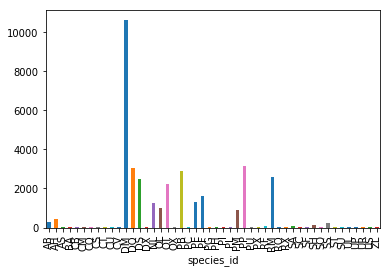

In [18]:
# create a quick bar chart
species_counts.plot(kind='bar');

We can also look at how many animals were captured in each site:

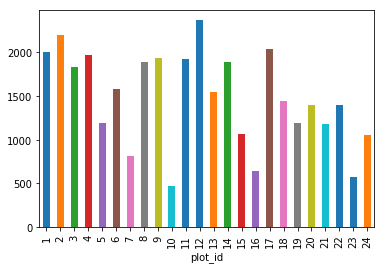

In [19]:
# Group by plot_id, and return the number of unique record ID's
total_count = surveys_df.groupby('plot_id')['record_id'].nunique()
# let's plot that too
total_count.plot(kind='bar')

### Challenge: Plots
>
> 1. Create a plot of average weight across all species per site.
> 2. Create a plot of total males versus total females for the entire dataset

In [20]:
# Plotting challenge code here!


## Summary Plotting Challenge
>
> Create a stacked bar plot, with weight on the Y axis, and the stacked variable
> being sex. The plot should show total weight by sex for each site. Some
> tips are below to help you solve this challenge:
>
> * You can use the code that follows to create a stacked bar plot but the data to stack
>  need to be in individual columns.  Here's a simple example with some data where
>  'a', 'b', and 'c' are the groups, and 'one' and 'two' are the subgroups.
>
> ```python
> d = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
> pd.DataFrame(d)
> ```
>
> shows the following data
>
> ```
>       one  two
>   a    1    1
>   b    2    2
>   c    3    3
>   d  NaN    4
> ```
>
> We can plot the above with
>
> ```
> # Plot stacked data so columns 'one' and 'two' are stacked
> my_df = pd.DataFrame(d)
> my_df.plot(kind='bar',stacked=True,title="The title of my graph")
> ```
>
> * You can use the `.unstack()` method to transform grouped data into columns
> for each plotting.  Try running `.unstack()` on some DataFrames above and see
> what it yields.
>
> Start by transforming the grouped data (by site and sex) into an unstacked layout, then create
> a stacked plot.

# Indexing, Slicing and Subsetting DataFrames in Python

## Indexing and Slicing in Python

We often want to work with subsets of a **DataFrame** object. There are
different ways to accomplish this including: using labels (column headings),
numeric ranges, or specific x,y index locations.


## Selecting data using Labels (Column Headings)

We use square brackets `[]` to select a subset of a Python object. For example,
we can select all data from a column named `species_id` from the `surveys_df`
DataFrame by name. There are two ways to do this:

In [21]:
# TIP: use the .head() method we saw earlier to make output shorter
# Method 1: select a 'subset' of the data using the column name
surveys_df['species_id']

# Method 2: use the column name as an 'attribute'; gives the same output
surveys_df.species_id

0         NL
1         NL
2         DM
3         DM
4         DM
5         PF
6         PE
7         DM
8         DM
9         PF
10        DS
11        DM
12        DM
13        DM
14        DM
15        DM
16        DS
17        PP
18        PF
19        DS
20        DM
21        NL
22        DM
23        SH
24        DM
25        DM
26        DM
27        DM
28        PP
29        DS
        ... 
35519     SF
35520     DM
35521     DM
35522     DM
35523     PB
35524     OL
35525     OT
35526     DO
35527     US
35528     PB
35529     OT
35530     PB
35531     DM
35532     DM
35533     DM
35534     DM
35535     DM
35536     DM
35537     PB
35538     SF
35539     PB
35540     PB
35541     PB
35542     PB
35543     US
35544     AH
35545     AH
35546     RM
35547     DO
35548    NaN
Name: species_id, Length: 35549, dtype: object

Now, let's store the `'species_id'` subset of the survey data:

In [22]:
# creates an object, surveys_species, that only contains the `species_id` column
surveys_species = surveys_df['species_id']

We can pass a list of column names too, as an index to select columns in that
order. This is useful when we need to reorganize our data.

**NOTE:** If a column name is not contained in the DataFrame, an exception
(error) will be raised.

In [23]:
# select the species and plot columns from the DataFrame
surveys_df[['species_id', 'plot_id']]

# what happens when you flip the order?
#surveys_df[['plot_id', 'species_id']]

#what happens if you ask for a column that doesn't exist?
#surveys_df['speciess']

,species_id,plot_id
0,NL,2
1,NL,3
2,DM,2
3,DM,7
4,DM,3
5,PF,1
6,PE,2
7,DM,1
8,DM,1
9,PF,6


## Extracting Range based Subsets: Slicing

> ## Reminder
> Python uses 0-based indexing.

### Slicing Subsets of Rows in Python

Slicing using the `[]` operator selects a set of rows and/or columns from a
DataFrame. To slice out a set of rows, you use the following syntax:
`data[start:stop]`. When slicing in pandas the start bound is included in the
output. The stop bound is one step BEYOND the row you want to select. So if you
want to select rows 0, 1 and 2 your code would look like this:

In [24]:
# select rows 0, 1, 2 (row 3 is not selected)
surveys_df[0:3]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN


In [25]:
# select the first 5 rows (rows 0, 1, 2, 3, 4)
surveys_df[:5]

# select the last element in the list
# (the slice starts at the last element,
# and ends at the end of the list)
surveys_df[-1:]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
35548,35549,12,31,2002,5,NaN,NaN,NaN,NaN


We can also reassign values within subsets of our DataFrame.

But before we do that, let's look at the difference between the concept of
copying objects and the concept of referencing objects in Python.

## Copying Objects vs Referencing Objects in Python

Let's start with an example:

In [26]:
# Using the 'copy() method'
true_copy_surveys_df = surveys_df.copy()

# Using the '=' operator
ref_surveys_df = surveys_df

You might think that the code `ref_surveys_df = surveys_df` creates a fresh
distinct copy of the `surveys_df` DataFrame object. However, using the `=`
operator in the simple statement `y = x` does **not** create a copy of our
DataFrame. Instead, `y = x` creates a new variable `y` that references the
**same** object that `x` refers to. To state this another way, there is only
**one** object (the DataFrame), and both `x` and `y` refer to it.

In contrast, the `copy()` method for a DataFrame creates a true copy of the
DataFrame.

Let's look at what happens when we reassign the values within a subset of the
DataFrame that references another DataFrame object:

In [27]:
# Assign the value `0` to the first three rows of data in the DataFrame
ref_surveys_df[0:3] = 0

Now, let's examine the differences between referencing and copying objects! First, let's compare
the result of our above efforts to set the first three rows of `ref_surveys_df` to 0:

In [28]:
# ref_surveys_df was created using the '=' operator
ref_surveys_df.head()

# surveys_df is the original dataframe
#surveys_df.head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,0,0,0,0,0,0,0,0.0,0.0
1,0,0,0,0,0,0,0,0.0,0.0
2,0,0,0,0,0,0,0,0.0,0.0
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN


What is the difference between these two dataframes?

When we assigned the first 3 columns the value of `0` using the
`ref_surveys_df` DataFrame, the `surveys_df` DataFrame is modified too.
Remember we created the reference `ref_survey_df` object above when we did
`ref_survey_df = surveys_df`. Remember `surveys_df` and `ref_surveys_df`
refer to the same exact DataFrame object. If either one changes the object,
the other will see the same changes to the reference object.

**To review and recap**:

- **Copy** uses the dataframe's `copy()` method

  ```
  true_copy_surveys_df = surveys_df.copy()
  ```
- A **Reference** is created using the `=` operator

  ```
  ref_surveys_df = surveys_df
  ```
Okay, that's enough of that.  Let's reload a clean copy of our survey data:

In [29]:
surveys_df = pd.read_csv('data/surveys.csv')

## Slicing Subsets of Rows and Columns in Python

We can select specific ranges of our data in both the row and column directions
using either label or integer-based indexing.

- `loc` is primarily *label* based indexing. *Integers* may be used but
  they are interpreted as a *label*.
- `iloc` is primarily *integer* based indexing

To select a subset of rows **and** columns from our DataFrame, we can use the
`iloc` method. For example, we can select month, day and year (columns 2, 3
and 4 if we start counting at 1), like this:

In [30]:
# iloc[row slicing, column slicing]
surveys_df.iloc[0:3, 1:4]

,month,day,year
0,7,16,1977
1,7,16,1977
2,7,16,1977


Notice that we asked for a slice from 0:3. This yielded 3 rows of data. When you
ask for 0:3, you are actually telling Python to start at index 0 and select rows
0, 1, 2 **up to but not including 3**.

Let's explore some other ways to index and select subsets of data:

In [31]:
# select all columns for rows of index values 0 and 10
surveys_df.loc[[0, 10], :]

# what does this do?
#surveys_df.loc[0, ['species_id', 'plot_id', 'weight']]

# What happens when you type the code below?
#surveys_df.loc[[0, 10, 35549], :]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
10,11,7,16,1977,5,DS,F,53.0,NaN


**NOTE**: Labels must be found in the DataFrame or you will get a `KeyError`.

Indexing by labels `loc` differs from indexing by integers `iloc`.
With `loc`, both the start bound and the stop bound are **inclusive**. When using
`loc`, integers *can* be used, but the integers refer to the
index label and not the position. For example, using `loc` and select 1:4
will get a different result than using `iloc` to select rows 1:4.

We can also select a specific data value using a row and
column location within the DataFrame and `iloc` indexing:

```
# Syntax for iloc indexing to finding a specific data element
dat.iloc[row, column]
```
In this `iloc` example:

In [32]:
surveys_df.iloc[2, 6]

'F'

Remember that Python indexing begins at 0. So, the index location [2, 6]
selects the element that is 3 rows down and 7 columns over in the DataFrame.

### Challenge: Range
>
> 1. What happens when you execute:
>
>    - `surveys_df[0:1]`
>    - `surveys_df[:4]`
>    - `surveys_df[:-1]`
>
> 2. What happens when you call:
>
>    - `surveys_df.iloc[0:4, 1:4]`
>    - `surveys_df.loc[0:4, 1:4]`
>
> - How are the two commands different?

In [33]:
# Range challenge code below!


## Subsetting Data using Criteria

We can also select a subset of our data using criteria. For example, we can
select all rows that have a year value of 2002:


In [34]:
# Boolean: Year matches 2002
surveys_df[surveys_df.year == 2002]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
33320,33321,1,12,2002,1,DM,M,38.0,44.0
33321,33322,1,12,2002,1,DO,M,37.0,58.0
33322,33323,1,12,2002,1,PB,M,28.0,45.0
33323,33324,1,12,2002,1,AB,NaN,NaN,NaN
33324,33325,1,12,2002,1,DO,M,35.0,29.0
33325,33326,1,12,2002,2,OT,F,20.0,26.0
33326,33327,1,12,2002,2,OT,M,20.0,24.0
33327,33328,1,12,2002,2,OT,F,21.0,22.0
33328,33329,1,12,2002,2,DM,M,37.0,47.0
33329,33330,1,12,2002,2,DO,M,35.0,51.0


Or we can select all rows that do not contain the year 2002:

In [35]:
# Boolean: Year matches 2002
surveys_df[surveys_df.year != 2002]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
5,6,7,16,1977,1,PF,M,14.0,NaN
6,7,7,16,1977,2,PE,F,NaN,NaN
7,8,7,16,1977,1,DM,M,37.0,NaN
8,9,7,16,1977,1,DM,F,34.0,NaN
9,10,7,16,1977,6,PF,F,20.0,NaN


We can define sets of criteria too:

In [36]:
# Returns subset of rows with year in range 1980-1985 (inclusive)
surveys_df[(surveys_df.year >= 1980) & (surveys_df.year <= 1985)]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
2270,2271,1,15,1980,8,DO,M,35.0,53.0
2271,2272,1,15,1980,11,PF,F,16.0,10.0
2272,2273,1,15,1980,18,DM,F,34.0,33.0
2273,2274,1,15,1980,11,DM,M,38.0,37.0
2274,2275,1,15,1980,8,DO,F,33.0,29.0
2275,2276,1,15,1980,11,DS,M,47.0,132.0
2276,2277,1,15,1980,8,PF,M,15.0,8.0
2277,2278,1,15,1980,9,OT,M,21.0,23.0
2278,2279,1,15,1980,11,DM,F,36.0,36.0
2279,2280,1,15,1980,21,OT,F,20.0,21.0


#### Python Syntax Cheat Sheet

We can use the syntax below when querying data by criteria from a DataFrame.
Experiment with selecting various subsets of the "surveys" data.

* Equals: `==`
* Not equals: `!=`
* Greater than, less than: `>` or `<`
* Greater than or equal to `>=`
* Less than or equal to `<=`


### Challenge: Queries
>
> 1. Select a subset of rows in the `surveys_df` DataFrame that contain data from
>   the year 1999 and that contain weight values less than or equal to 8. How
>   many rows did you end up with? What did your neighbor get?
>
> 2. You can use the `isin` command in Python to query a DataFrame based upon a
>   list of values as follows:
>
>    ```python
>    surveys_df[surveys_df['species_id'].isin([listGoesHere])]
>    ```
>
>   Use the `isin` function to find all plots that contain particular species
>   in the "surveys" DataFrame. How many records contain these values?
>
> 3. Experiment with other queries. Create a query that finds all rows with a
>   weight value > or equal to 0.
>
> 4. The `~` symbol in Python can be used to return the OPPOSITE of the
>   selection that you specify in Python. It is equivalent to **is not in**.
>   Write a query that selects all rows with sex NOT equal to 'M' or 'F' in
>   the "surveys" data.

In [37]:
# Queries challenge code below!


## Using masks to identify a specific condition

A **mask** can be useful to locate where a particular subset of values exist or
don't exist - for example,  NaN, or "Not a Number" values. To understand masks,
we also need to understand `BOOLEAN` objects in Python.

Boolean values include `True` or `False`. For example,

```python
# Set x to 5
x = 5

# What does the code below return?
x > 5

# How about this?
x == 5
```

When we ask Python whether `x` is greater than 5, it returns `False`.
This is Python's way to say "No". Indeed, the value of `x` is 5,
and 5 is not greater than 5.

To create a boolean mask:

- Set the True / False criteria (e.g. `values > 5 = True`)
- Python will then assess each value in the object to determine whether the
  value meets the criteria (True) or not (False).
- Python creates an output object that is the same shape as the original
  object, but with a `True` or `False` value for each index location.

Let's try this out. Let's identify all locations in the survey data that have
null (missing or NaN) data values. We can use the `isnull` method to do this.
The `isnull` method will compare each cell with a null value. If an element
has a null value, it will be assigned a value of  `True` in the output object.

In [38]:
# Query a Boolean mask for null values in survey data
pd.isnull(surveys_df)

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,True
5,False,False,False,False,False,False,False,False,True
6,False,False,False,False,False,False,False,True,True
7,False,False,False,False,False,False,False,False,True
8,False,False,False,False,False,False,False,False,True
9,False,False,False,False,False,False,False,False,True


To select the rows where there are null values, we can use
the mask as an index to subset our data as follows:

In [39]:
# To select just the rows with NaN values, we can use the 'any()' method
surveys_df[pd.isnull(surveys_df).any(axis=1)]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
5,6,7,16,1977,1,PF,M,14.0,NaN
6,7,7,16,1977,2,PE,F,NaN,NaN
7,8,7,16,1977,1,DM,M,37.0,NaN
8,9,7,16,1977,1,DM,F,34.0,NaN
9,10,7,16,1977,6,PF,F,20.0,NaN


Note that the `weight` column of our DataFrame contains many `null` or `NaN`
values. We will explore ways of dealing with this below.

We can run `isnull` on a particular column too. What does the code below do?

```python
# What does this do?
empty_weights = surveys_df[pd.isnull(surveys_df['weight'])]['weight']
print(empty_weights)
```

Let's take a minute to look at the statement above. We are using the Boolean
object `pd.isnull(surveys_df['weight'])` as an index to `surveys_df`. We are
asking Python to select rows that have a `NaN` value of weight.

### Challenge - Putting it all together
>
> 1. Create a new DataFrame that only contains observations with sex values that
>   are **not** female or male. Assign each sex value in the new DataFrame to a
>   new value of 'x'. Determine the number of null values in the subset.
>
> 2. Create a new DataFrame that contains only observations that are of sex male
>   or female and where weight values are greater than 0. Create a stacked bar
>   plot of average weight by plot with male vs female values stacked for each
>   plot.

In [40]:
# Put it all together below:


# Data Types and Formats
The format of individual columns and rows will impact analysis performed on a
dataset read into python. For example, you can't perform mathematical
calculations on a string (text formatted data). This might seem obvious,
however sometimes numeric values are read into Python as strings. In this
situation, when you then try to perform calculations on the string-formatted
numeric data, you get an error.

In this lesson we will review ways to explore and better understand the
structure and format of our data.

## Types of Data

How information is stored in a
DataFrame or a Python object affects what we can do with it and the outputs of
calculations as well. There are two main types of data that we're explore in
this lesson: numeric and text data types.

### Numeric Data Types

Numeric data types include integers and floats. A **floating point** (known as a
float) number has decimal points even if that decimal point value is 0. For
example: 1.13, 2.0, 1234.345. If we have a column that contains both integers and
floating point numbers, Pandas will assign the entire column to the float data
type so the decimal points are not lost.

An **integer** will never have a decimal point. Thus if we wanted to store 1.13 as
an integer it would be stored as 1. Similarly, 1234.345 would be stored as 1234. You
will often see the data type `Int64` in Python which stands for 64 bit integer. The 64
simply refers to the memory allocated to store data in each cell which effectively
relates to how many digits it can store in each "cell". Allocating space ahead of time
allows computers to optimize storage and processing efficiency.

### Text Data Type

Text data type is known as Strings in Python, or Objects in Pandas. Strings can
contain numbers and / or characters. For example, a string might be a word, a
sentence, or several sentences. A Pandas object might also be a plot name like
'plot1'. A string can also contain or consist of numbers. For instance, '1234'
could be stored as a string. As could '10.23'. However **strings that contain
numbers can not be used for mathematical operations**!

Pandas and base Python use slightly different names for data types. More on this
is in the table below:

| Pandas Type | Native Python Type | Description |
|-------------|--------------------|-------------|
| object | string | The most general dtype. Will be assigned to your column if column has mixed types (numbers and strings). |
| int64  | int | Numeric characters. 64 refers to the memory allocated to hold this character. |
| float64 | float | Numeric characters with decimals. If a column contains numbers and NaNs (see below), pandas will default to float64, in case your missing value has a decimal. |
| datetime64, timedelta[ns] | N/A (but see the [datetime] module in Python's standard library) | Values meant to hold time data. Look into these for time series experiments. |

[datetime]: http://doc.python.org/2/library/datetime.html


### Checking the format of our data

Now that we're armed with a basic understanding of numeric and text data
types, let's explore the format of our survey data. Remember that we can check 
the type of an object like this:

```python
> type(surveys_df)
        pandas.core.frame.DataFrame
```

Next, let's look at the structure of our surveys data. In pandas, we can check
the type of one column in a DataFrame using the syntax
`dataFrameName[column_name].dtype`:

In [41]:
# Check data type for survey column "record_id"
surveys_df['record_id'].dtype

dtype('int64')

The type `int64` tells us that Python is storing each value within this column
as a 64 bit integer. We can use the `dat.dtypes` command to view the data type
for each column in a DataFrame (all at once).

In [42]:
# Get the data types for all columns of surveys dataframe
surveys_df.dtypes

record_id            int64
month                int64
day                  int64
year                 int64
plot_id              int64
species_id          object
sex                 object
hindfoot_length    float64
weight             float64
dtype: object

Note that most of the columns in our Survey data are of type `int64`. This means
that they are 64 bit integers. But the weight column is a floating point value
which means it contains decimals. The `species_id` and `sex` columns are objects which
means they contain strings. 

We can modify the format of values within our data, if
we want. For instance, we could convert the `record_id` field to floating point
values.

```python
# Convert the record_id field from an integer to a float
surveys_df['record_id'] = surveys_df['record_id'].astype('float64')
surveys_df['record_id'].dtype
```

```python
dtype('float64')
```

### Challenge: Changing Types
>
> Try converting the column `plot_id` to floats using
>
> ```
> surveys_df.plot_id.astype("float")
> ```
>
> Next try converting `weight` to an integer. What goes wrong here? What is Pandas telling you?
> We will talk about some solutions to this later.

In [43]:
# Changing type challenge below!


### Missing Data Values - NaN

What happened in the last challenge activity? Notice that this throws a value error:
`ValueError: Cannot convert NA to integer`. If we look at the `weight` column in the surveys
data we notice that there are NaN (**N**ot **a** **N**umber) values. **NaN** values are undefined
values that cannot be represented mathematically. Pandas, for example, will read
an empty cell in a CSV or Excel sheet as a NaN. NaNs have some desirable properties: if we
were to average the `weight` column without replacing our NaNs, Python would know to skip
over those cells.

In [44]:
# Mean weight of sample
surveys_df['weight'].mean()

42.672428212991356

Dealing with missing data values is always a challenge. It's sometimes hard to
know why values are missing - was it because of a data entry error? Or data that
someone was unable to collect? Should the value be 0? We need to know how
missing values are represented in the dataset in order to make good decisions.
If we're lucky, we have some metadata that will tell us more about how null
values were handled.

For instance, in some disciplines, like Remote Sensing, missing data values are
often defined as -9999. Having a bunch of -9999 values in your data could really
alter numeric calculations. Often in spreadsheets, cells are left empty where no
data are available. Pandas will, by default, replace those missing values with
NaN. However it is good practice to get in the habit of intentionally marking
cells that have no data, with a no data value! That way there are no questions
in the future when you (or someone else) explores your data.

#### Where Are the NaN's?

Let's explore the NaN values in our data a bit further. Using the tools we
learned above, we can figure out how many rows contain NaN values for
weight. We can also create a new subset from our data that only contains rows
with weight values > 0 (i.e., select meaningful weight values):

In [45]:
nullweights = surveys_df[pd.isnull(surveys_df.weight)]
positiveweights = surveys_df[surveys_df.weight> 0]

print(len(nullweights))
print(len(positiveweights))

3266
32283


We can replace all NaN values with zeroes using the `.fillna()` method (after
making a copy of the data so we don't lose our work):

In [46]:
# Make a true copy of survey data
df1 = surveys_df.copy()

# Fill NaN values in "weight" column with 0's using `.fillna()`
df1['weight'] = df1['weight'].fillna(0)

However NaN and 0 yield different analysis results. The mean value when NaN
values are replaced with 0 is different from when NaN values are simply thrown
out or ignored:

In [47]:
# Compute mean weight for 0-padded survey data
df1['weight'].mean()

38.751976145601844

We can fill NaN values with any value that we chose. The code below fills all
NaN values with a mean for all weight values:

In [48]:
df1['weight'] = surveys_df['weight'].fillna(surveys_df['weight'].mean())

We could also chose to create a subset of our data, only keeping rows that do
not contain NaN values.

The point is to make conscious decisions about how to manage missing data. This
is where we think about how our data will be used and how these values will
impact the scientific conclusions made from the data.

Python gives us all of the tools that we need to account for these issues. We
just need to be cautious about how the decisions that we make impact scientific
results.

### Challenge - Counting
> Count the number of missing values per column. Hint: The method .count() gives you
> the number of non-NA observations per column. Try looking to the .isnull() method.

In [49]:
# Counting challenge code below:


## Writing Out Data to CSV

We've learned about using manipulating data to get desired outputs. But we've also discussed
keeping data that has been manipulated separate from our raw data. Something we might be interested
in doing is working with only the columns that have full data. First, let's reload the data so
we're not mixing up all of our previous manipulations.

```python
surveys_df = pd.read_csv("data/surveys.csv")
```

Next, let's drop all the rows that contain missing values. We will use the command `dropna`.
By default, dropna removes rows that contain missing data for even just one column.

In [50]:
# Drop NaN's from survey data, return to new dataframe
df_na = surveys_df.dropna()

If you now type `df_na`, you should observe that the resulting DataFrame has 30676 rows
and 9 columns, much smaller than the 35549 row original.

We can now use the `to_csv` command to do export a DataFrame in CSV format. Note that the code
below will by default save the data into the current working directory. We can
save it to a different folder by adding the foldername and a slash before the filename:
`df.to_csv('foldername/out.csv')`. We use 'index=False' so that
pandas doesn't include the index number for each line.

```python
# Write DataFrame to CSV
df_na.to_csv('data_output/surveys_complete.csv', index=False)
```

## Recap

What we've learned:

+ How to explore the data types of columns within a DataFrame
+ How to change the data type
+ What NaN values are, how they might be represented, and what this means for your work
+ How to replace NaN values, if desired
+ How to use `to_csv` to write manipulated data to a file.